In [2]:
%matplotlib inline

In [25]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
matplotlib.style.use('ggplot')

In [19]:
data_df = pandas.DataFrame.from_csv('desalination_capacity_data.csv')

In [27]:
data_df

,Average (m^3/day),Waterworld (2013) (m^3 / day),Wikipedia (n.d.) (m^3 / day),Other Sources,Source,Oil Production (bbl/day),Average Temperature (deg C),Population
Country,,,,,,,,
Algeria,2192027.5,2364055.0,2020000.0,NaN,NaN,1171000,22.50,40375954
Aruba,42000.0,NaN,42000.0,NaN,NaN,2800,28.00,104263
Australia,2071077.0,1823154.0,NaN,2319000.0,https://en.wikipedia.org/wiki/Seawater_desalin...,292000,21.65,24309330
Bahrain,308760.0,NaN,308760.0,NaN,NaN,64000,27.15,1396829
Chile,54000.0,NaN,NaN,54000.0,https://www.acciona.com/business-divisions/inf...,15000,8.45,18131850
China,1494198.0,1494198.0,NaN,NaN,NaN,3938000,6.95,1382323332
Cyprus,405000.0,NaN,NaN,405000.0,http://www.moa.gov.cy/moa/wdd/wdd.nsf/All/E98E...,0,18.45,1176598
Egypt,36000.0,NaN,36000.0,NaN,NaN,582000,22.10,93383574
Israel,1615676.5,1532723.0,1698630.0,NaN,NaN,5800,19.20,8192463


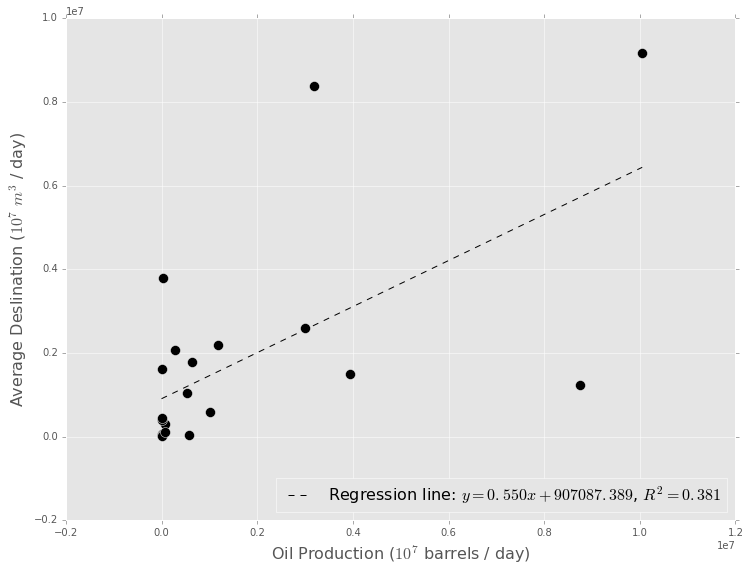

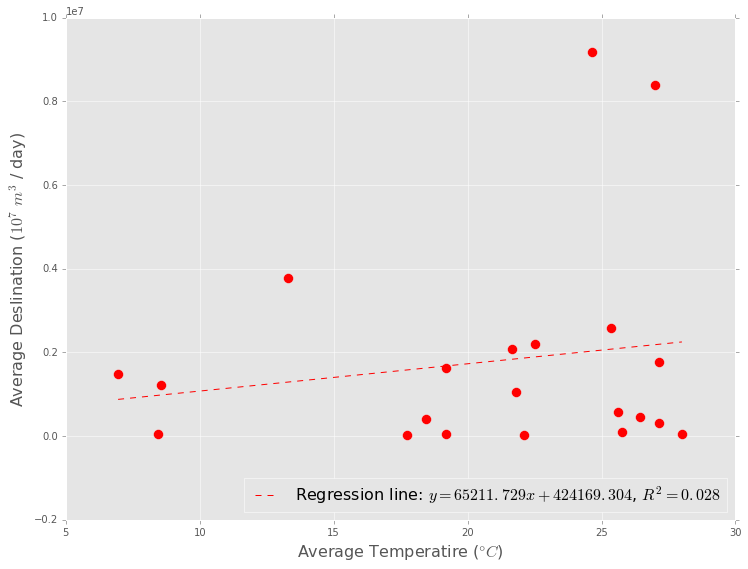

In [110]:
def scatter_plot(x_data, x_label, color, y_data='Average (m^3/day)',
                 y_label=r'Average Deslination ($10^7$ $m^3$ / day)'):
    ax = data_df.plot(x=x_data, y=y_data, kind='scatter', figsize=(12, 9), color=color, s=100)

    regression_X = data_df[x_data]
    regression_X = sm.add_constant(regression_X)
    y = data_df[y_data]

    regression_model = sm.OLS(y, regression_X)
    regression_results = regression_model.fit()

    line_x = np.linspace(min(data_df[x_data]), max(data_df[x_data]))
    m = regression_results.params[x_data]
    b = regression_results.params['const']
    ax.add_line(plt.Line2D(line_x, line_x * m + b, ls='--', color=color,
                 label=r'Regression line: $y = {m:.3f}x + {b:.3f}$, $R^2 = {r2:.3f}$'
                .format(m=m, b=b, r2=regression_results.rsquared)))

    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc=4, fontsize=16)
    plt.show()
    
scatter_plot('Oil Production (bbl/day)', r'Oil Production ($10^7$ barrels / day)', 'black')
scatter_plot('Average Temperature (deg C)', r'Average Temperatire ($\degree C$)', 'red')



In [35]:
X = data_df[['Oil Production (bbl/day)', 'Average Temperature (deg C)']] #, 'Population']]
X = sm.add_constant(X)
y = data_df['Average (m^3/day)']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Average (m^3/day)   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     8.047
Date:                Fri, 21 Apr 2017   Prob (F-statistic):            0.00319
Time:                        10:53:05   Log-Likelihood:                -332.30
No. Observations:                  21   AIC:                             670.6
Df Residuals:                      18   BIC:                             673.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const                       -1.667e+06   1.54e+06     -1.082      0.293      -4.9e+06  1.57e+06
Oil Production (bbl/day)        0.6067      0.156      3.889      0.001         0.279     0.934
Average Temperature (deg C)  1.194e+05   6.77e+04      1.763      0.095     -2.29e+04  2.62e+05
==============================================================================
Omnibus:                        7.735   Durbin-Watson:                   2.905
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                5.210
Skew:                           1.020   Prob(JB):                       0.0739
Kurtosis:                       4.340   Cond. No.                     1.16e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

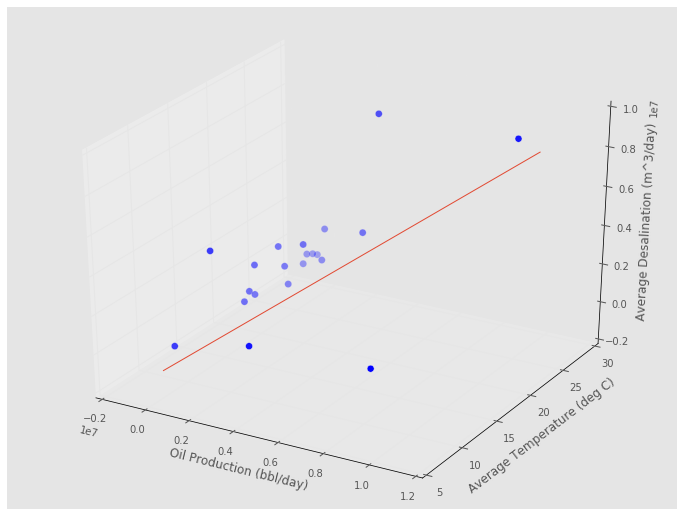

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,9), dpi=800)
ax = fig.add_subplot(111, projection='3d')

x = data_df['Oil Production (bbl/day)']
y = data_df['Average Temperature (deg C)']
z = data_df['Average (m^3/day)']
ax.scatter(x, y, z, s=50)

x_range = np.linspace(min(x), max(x))
y_range = np.linspace(min(y), max(y))
regression_z = [results.params['const'] + \
                results.params['Oil Production (bbl/day)'] * x1 + \
                results.params['Average Temperature (deg C)'] * y1
                for x1, y1 in zip(x_range, y_range)]
ax.plot(x_range, y_range, regression_z)

ax.set_xlabel('Oil Production (bbl/day)')
ax.set_ylabel('Average Temperature (deg C)')
ax.set_zlabel('Average Desalination (m^3/day)')

plt.show()

In [73]:
x_range = np.linspace(min(x), max(x))
y_range = np.linspace(min(y), max(y))
regression_z = [results.params['const'] + \
                results.params['Oil Production (bbl/day)'] * x1 + \
                results.params['Average Temperature (deg C)'] * y1
                for x1, y1 in zip(x_range, y_range)]

In [115]:
#del data_df['Source']
print data_df.to_latex(na_rep='')

\begin{tabular}{lrrrrrrr}
\toprule
{} &  Average (m\textasciicircum3/day) &  Waterworld (2013) (m\textasciicircum3 / day) &  Wikipedia (n.d.) (m\textasciicircum3 / day) &  Other Sources &  Oil Production (bbl/day) &  Average Temperature (deg C) &  Population \\
Country           &                    &                                &                               &                &                           &                              &             \\
\midrule
Algeria           &          2192027.5 &                      2364055.0 &                     2020000.0 &                &                   1171000 &                        22.50 &    40375954 \\
Aruba             &            42000.0 &                                &                       42000.0 &                &                      2800 &                        28.00 &      104263 \\
Australia         &          2071077.0 &                      1823154.0 &                               &      2319000.0 &                

50